In [1]:
using DIVAnd
using NCDatasets
using Dates
using PyPlot
const plt = PyPlot
using PyCall
mpl = pyimport("matplotlib")
mpl.style.use("./mosaic.mplstyle")
ccrs = pyimport("cartopy.crs")
cfeature = pyimport("cartopy.feature")

PyObject <module 'cartopy.feature' from '/home/ctroupin/.local/lib/python3.10/site-packages/cartopy/feature/__init__.py'>

In [2]:
datadir = "../data/"
datafile = joinpath(datadir, "Ocean_Basic_Hydrographic_Observations_from_Polarstern_and_Ocean_City_CTD_Profile_Data_uPlGpFAw.txt")
datafilenc = joinpath(datadir, "data_from_Ocean_Basic_Hydrographic_Observations_from_Polarstern_and_Ocean_City_CTD_Profile_Data_uPlGpFAw.nc")
isfile(datafile) & isfile(datafilenc)

true

In [3]:
varname = "in-situ temperature ITS-90"

"in-situ temperature ITS-90"

In [4]:
ds = NCDataset(datafilenc)
lon = NCDatasets.varbyattrib(ds, standard_name="longitude")[1][:]
lat = NCDatasets.varbyattrib(ds, standard_name="latitude")[1][:]
pressure = NCDatasets.varbyattrib(ds, long_name="Pressure")[1][:]
time = NCDatasets.varbyattrib(ds, standard_name="time")[1][:]
var = NCDatasets.varbyattrib(ds, long_name="in-situ temperature ITS-90")[1][:]
close(ds)

closed Dataset

## Plot on map

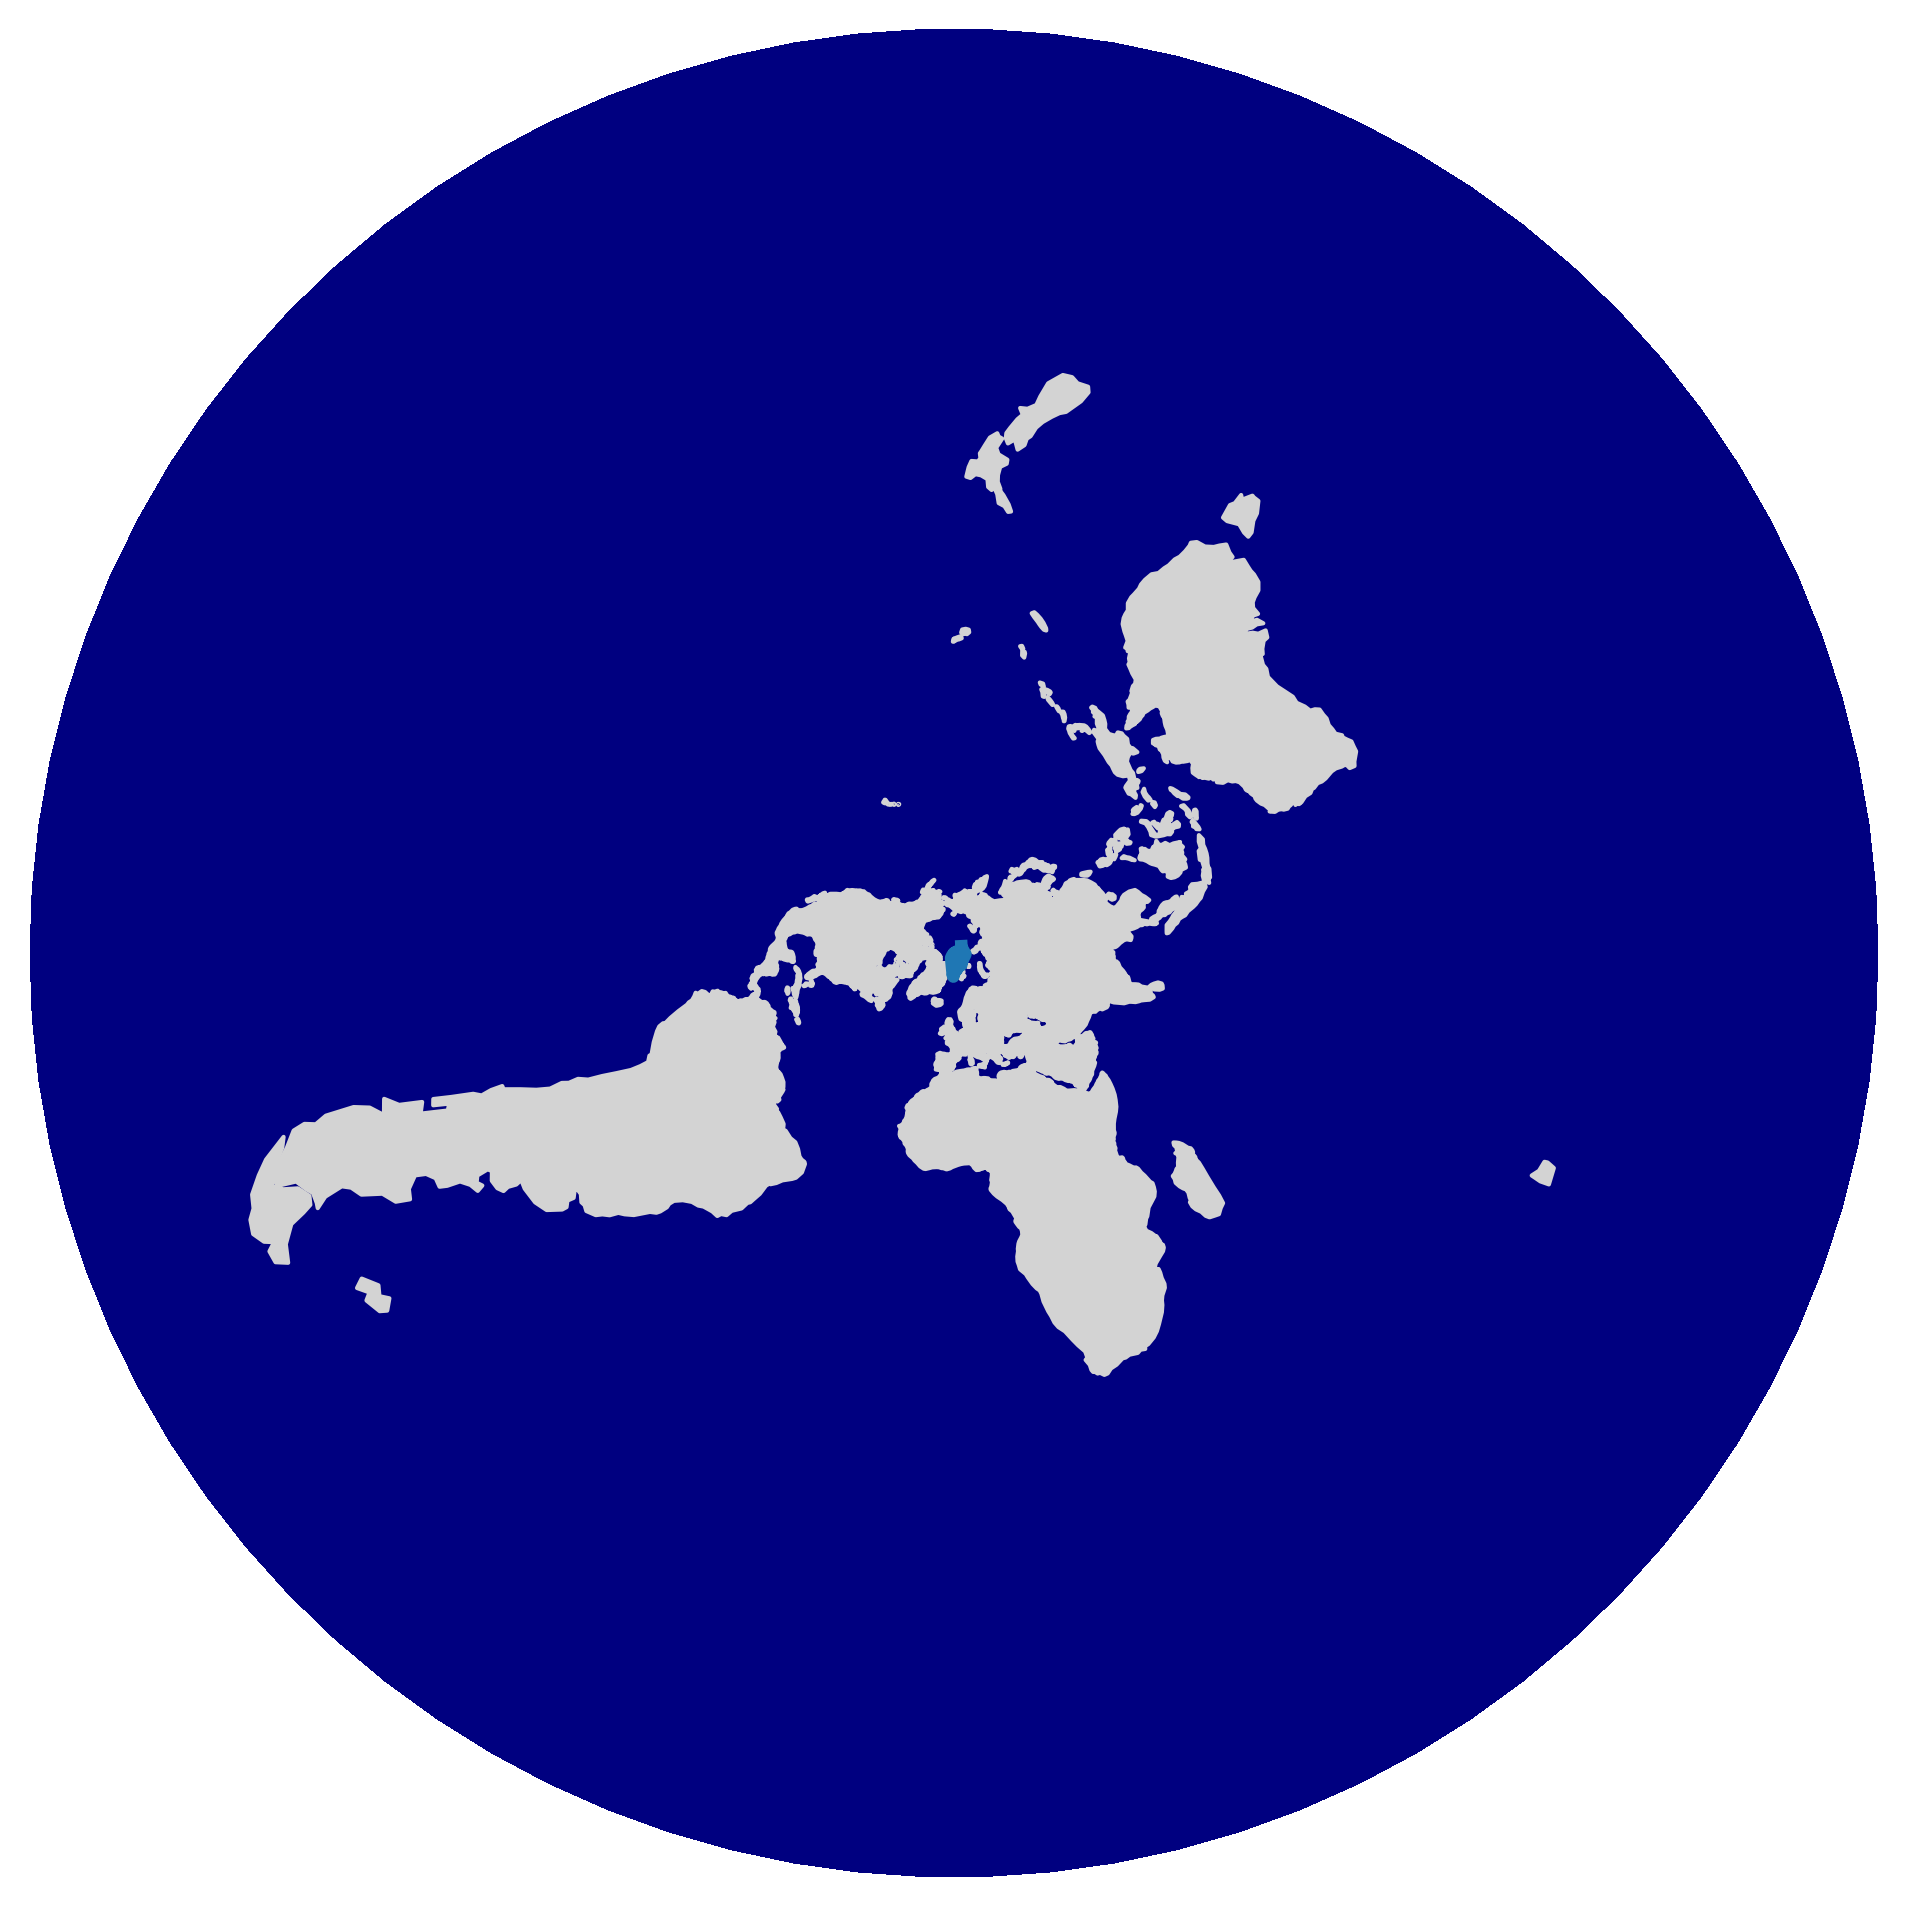

(-5.0e7, 5.0e7, -5.000000000035536e7, 5.000000000035536e7)

In [5]:
fig = plt.figure()
ax = subplot(projection=ccrs.NorthPolarStereo())
ax.plot(lon, lat, transform=ccrs.PlateCarree())
ax.set_global() 
ax.add_feature(cfeature.OCEAN, color="navy")
ax.add_feature(cfeature.LAND, color="lightgray")
axis("off")

## Vectorize

In [8]:
nsamples, nprofiles = var
lonall = Float64[]
latall = Float64[]
pressureall = Float64[]
timeall = Dates.DateTime[]
varall = Float64[]

# Loop on the profiles
for iii in 1:nprofiles
    var_profile = var[:,iii];
    goodlevels = findall(.!ismissing.(var_profile))
    npoints = length(goodlevels)
    @debug("Found $(npoints) good data points in the profile")
    var_profile = var_profile[goodlevels]
    pressure_profile = pressure[goodlevels, iii]
    lon_profile = fill(lon[iii], npoints)
    lat_profile = fill(lat[iii], npoints)
    time_profile = fill(time[iii], npoints)
    append!(lonall, lon_profile)
    append!(latall, lon_profile)
    append!(timeall, time_profile)
    append!(pressureall, pressure_profile)
    append!(varall, var_profile)
end 

## Plot all the profiles

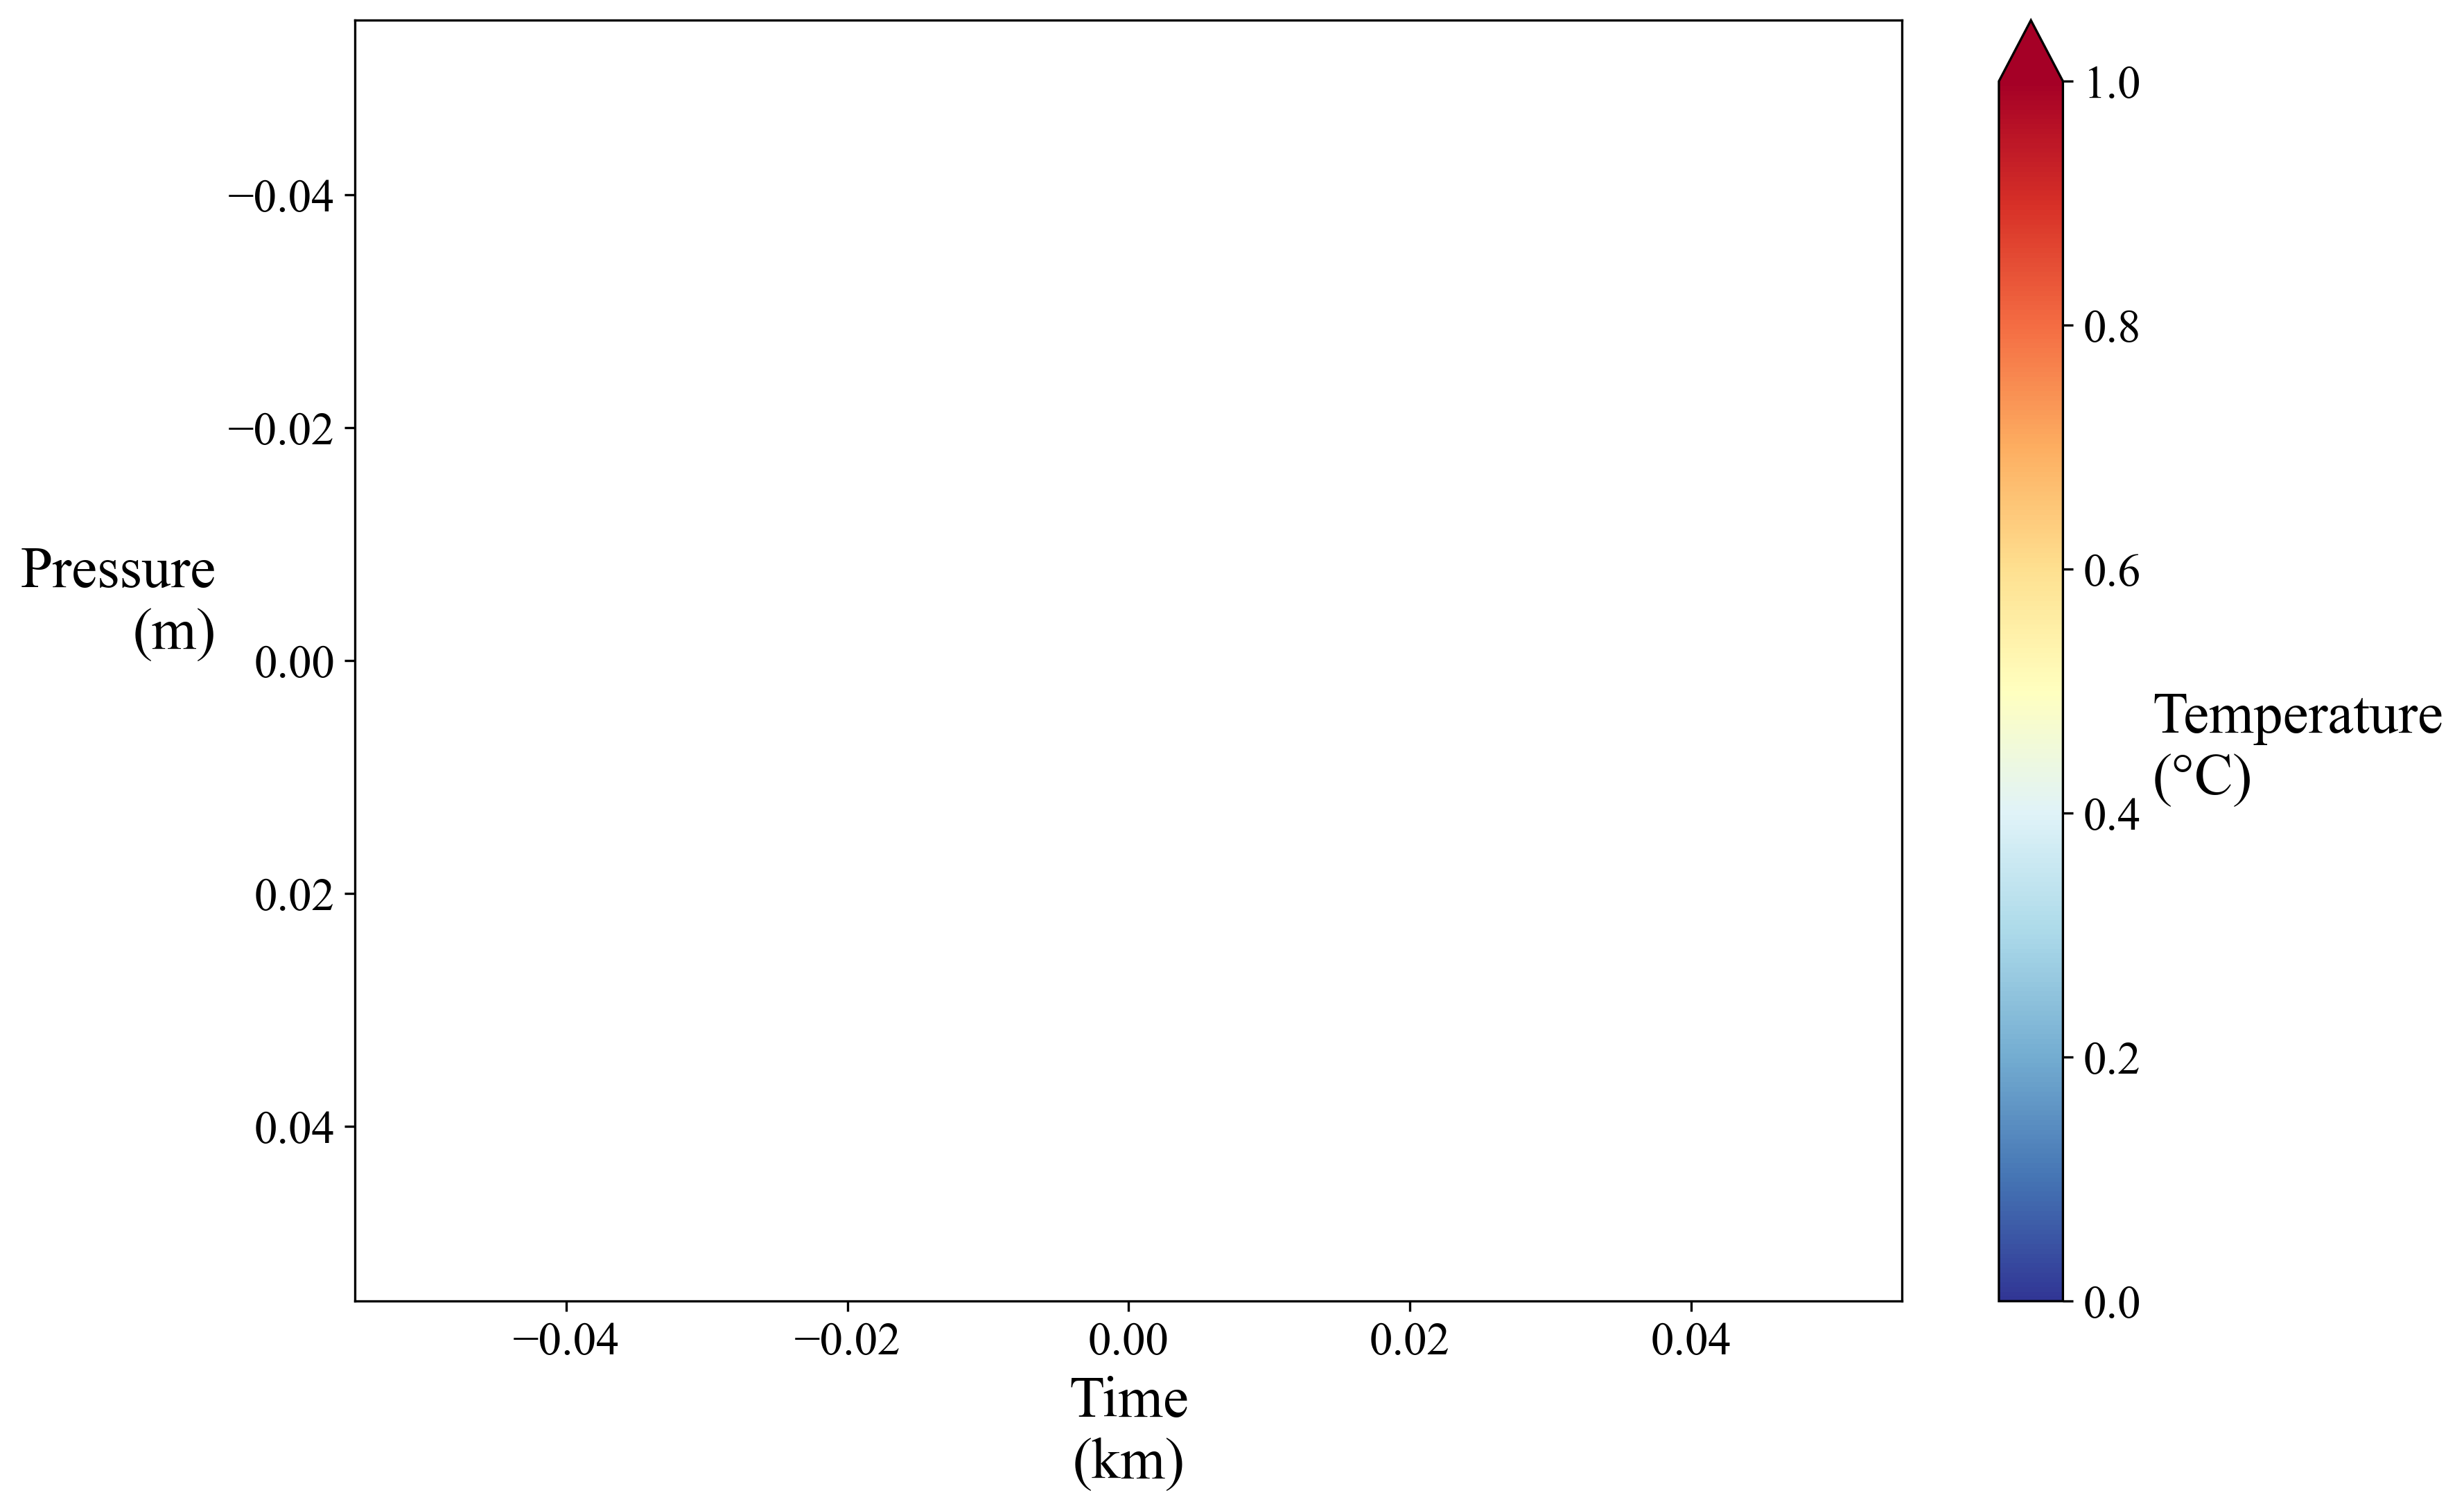

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
scat = ax.scatter(Dates.datetime2julian.(timeall), pressureall, s=4, c=varall, cmap=plt.cm.RdYlBu_r)
cb = plt.colorbar(scat, extend="max")
cb.set_label("Temperature\n(°C)", rotation=0, ha="left")
ax.set_xlabel("Time\n(km)")
ax.set_ylabel("Pressure\n(m)", rotation=0, ha="right")
plt.gca().invert_yaxis()